In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [114]:
# Busca os dados em um csv
historico_lutas = pd.read_csv(r"C:\Users\Rafael\Desktop\MBA\TCC\python_tcc\fight_data.csv", encoding='latin-1')

In [115]:
# Configura para printar objetos no console
pd.set_option("display.max.columns", None)

In [116]:
# Renomeia todas as variáveis pelos nomes
historico_lutas = historico_lutas.rename(columns={'Event Name':'Evento',
                                                  'W/L': 'Resultado',
                                                  'FIGHTER': 'Lutador',
                                                  'KD': 'Knockdowns',
                                                  'TD': 'Takedowns',
                                                  'SUB (stats)': 'Finalizações',
                                                  'WEIGHT CLASS': 'Categoria',
                                                  'METHOD': 'Metodo',
                                                  'SUB': 'Finalização',
                                                  'ROUND': 'Round',
                                                  'TIME': 'Tempo',
                                                  'STR': 'Golpes'})

In [117]:
# Filtro: somente vitórias por finalização (exclui knockouts, pontos, etc)
historico_finalizações = historico_lutas.query('Metodo == "SUB" and Resultado == "Win"')

In [118]:
print(historico_finalizações)

                                   Evento Resultado          Lutador  \
38     UFC Fight Night: Emmett vs. Murphy       Win    Dione Barbosa   
54      UFC Fight Night: Moreno vs. Erceg       Win    Edgar Chairez   
74     UFC Fight Night: Edwards vs. Brady       Win       Sean Brady   
80     UFC Fight Night: Edwards vs. Brady       Win  Alexia Thainara   
82     UFC Fight Night: Edwards vs. Brady       Win     Chris Duncan   
...                                   ...       ...              ...   
16248                   UFC 2: No Way Out       Win    Jason DeLucia   
16250                   UFC 2: No Way Out       Win    Remco Pardoel   
16254                   UFC 2: No Way Out       Win    Frank Hamaker   
16258                   UFC 2: No Way Out       Win    Patrick Smith   
16260                   UFC 2: No Way Out       Win     Scott Morris   

      Knockdowns Golpes Takedowns Finalizações            Categoria Metodo  \
38             0     27         1            1    Women's

In [119]:
# Estatísticas descritivas para categoria
print("\nEstatísticas descritivas de Categoria:")
print(historico_finalizações[['Categoria', 'Finalização']].describe())


Estatísticas descritivas de Categoria:
          Categoria       Finalização
count          1584              1583
unique           14                36
top     Lightweight  Rear Naked Choke
freq            302               606


In [120]:
# Frequência de finalizações por categoria
print("\nFrequência de finalizações por categoria:")
freq_gender = pd.crosstab(historico_finalizações['Categoria'], historico_finalizações['Finalização'])
print(freq_gender)


Frequência de finalizações por categoria:
Finalização            Anaconda Choke  Ankle Lock  Arm Triangle  Armbar  \
Categoria                                                                 
Bantamweight                        3           0            13      13   
Catch Weight                        0           0             0       1   
Featherweight                       7           0            12       5   
Flyweight                           0           0             6       7   
Heavyweight                         0           1            10      19   
Light Heavyweight                   4           0            12       9   
Lightweight                         3           3            11      28   
Middleweight                        5           1            27      23   
Open Weight                         0           2             2       7   
Welterweight                        8           2            21      27   
Women's Bantamweight                1           0        

# Teste Qui-quadrado
Como o p-valor (0.0000) é menor que o nível de significância comum (0.05), nós rejeitamos a hipótese nula (H₀).

Isso significa que há evidência estatística muito forte para concluir que existe uma associação significativa entre a categoria de peso ('Categoria') e o tipo de finalização ('Finalização') no seu conjunto de dados (historico_finalizações).

Em termos mais simples: O tipo de finalização utilizado não é aleatório entre as categorias de peso; ele depende da categoria. Certos tipos de finalização são mais (ou menos) prováveis de ocorrer em certas categorias de peso do que seria esperado apenas pelo acaso.

In [121]:
# Teste Qui-quadrado para associação entre categoria e finalização
chi2, p, dof, expected = chi2_contingency(freq_gender)
print(f"\nTeste Qui-quadrado (Categoria vs. Finalização): chi2 = {chi2:.2f}, p-valor = {p:.4f}")


Teste Qui-quadrado (Categoria vs. Finalização): chi2 = 892.58, p-valor = 0.0000


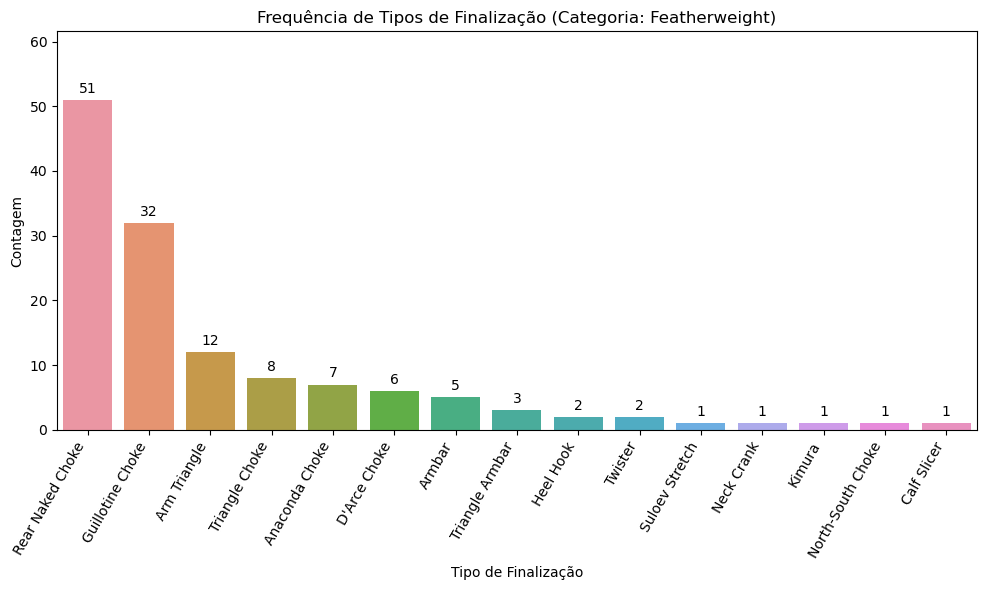

In [122]:
# Visualização: Gráfico de barras para finalizações por categoria

historico_featherweight = historico_lutas.query('Metodo == "SUB" and Resultado == "Win" and Categoria == "Featherweight"')

ordem_categorias = historico_featherweight['Finalização'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=historico_featherweight, x='Finalização',
                   order=ordem_categorias) # <--- Passa a ordem aqui
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# --- Configurações Finais do Gráfico ---
plt.title('Frequência de Tipos de Finalização (Categoria: Featherweight)') # Título mais específico
plt.xlabel("Tipo de Finalização") 
plt.ylabel("Contagem")   # Rótulo do eixo Y
plt.xticks(rotation=60, ha='right') # Aumentei a rotação para nomes longos
plt.ylim(top=ax.get_ylim()[1] * 1.15) # Aumentei um pouco mais o limite Y
plt.tight_layout() # Ajusta o layout
plt.show()

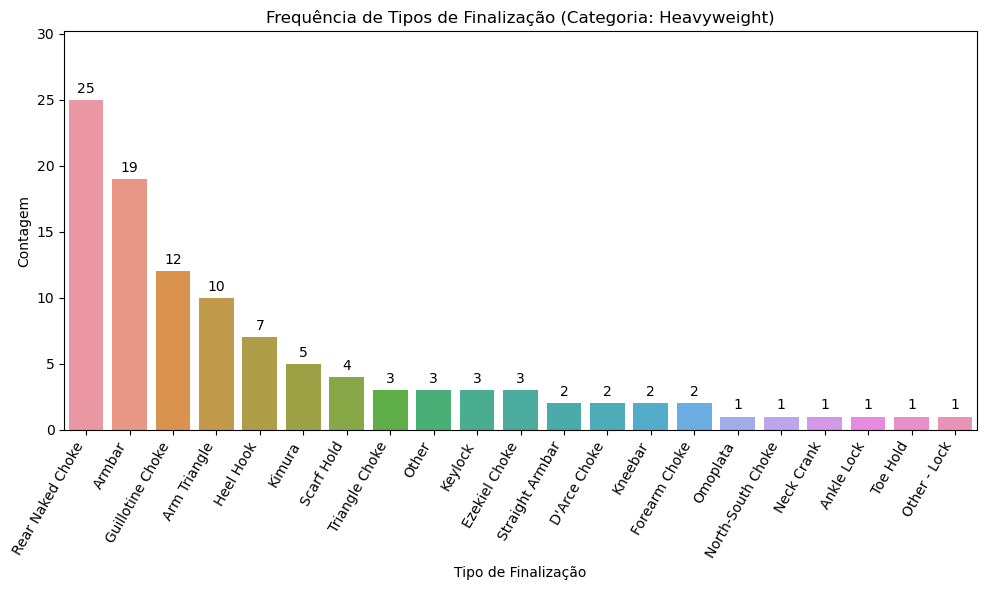

In [123]:
# Visualização: Gráfico de barras para finalizações por categoria

historico_heavyweight = historico_lutas.query('Metodo == "SUB" and Resultado == "Win" and Categoria == "Heavyweight"')

ordem_categorias = historico_heavyweight['Finalização'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=historico_heavyweight, x='Finalização',
                   order=ordem_categorias) # <--- Passa a ordem aqui
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# --- Configurações Finais do Gráfico ---
plt.title('Frequência de Tipos de Finalização (Categoria: Heavyweight)') # Título mais específico
plt.xlabel("Tipo de Finalização") 
plt.ylabel("Contagem")   # Rótulo do eixo Y
plt.xticks(rotation=60, ha='right') # Aumentei a rotação para nomes longos
plt.ylim(top=ax.get_ylim()[1] * 1.15) # Aumentei um pouco mais o limite Y
plt.tight_layout() # Ajusta o layout
plt.show()

# Mapa de Calor
Frequência de Tipos de Finalização por Categoria


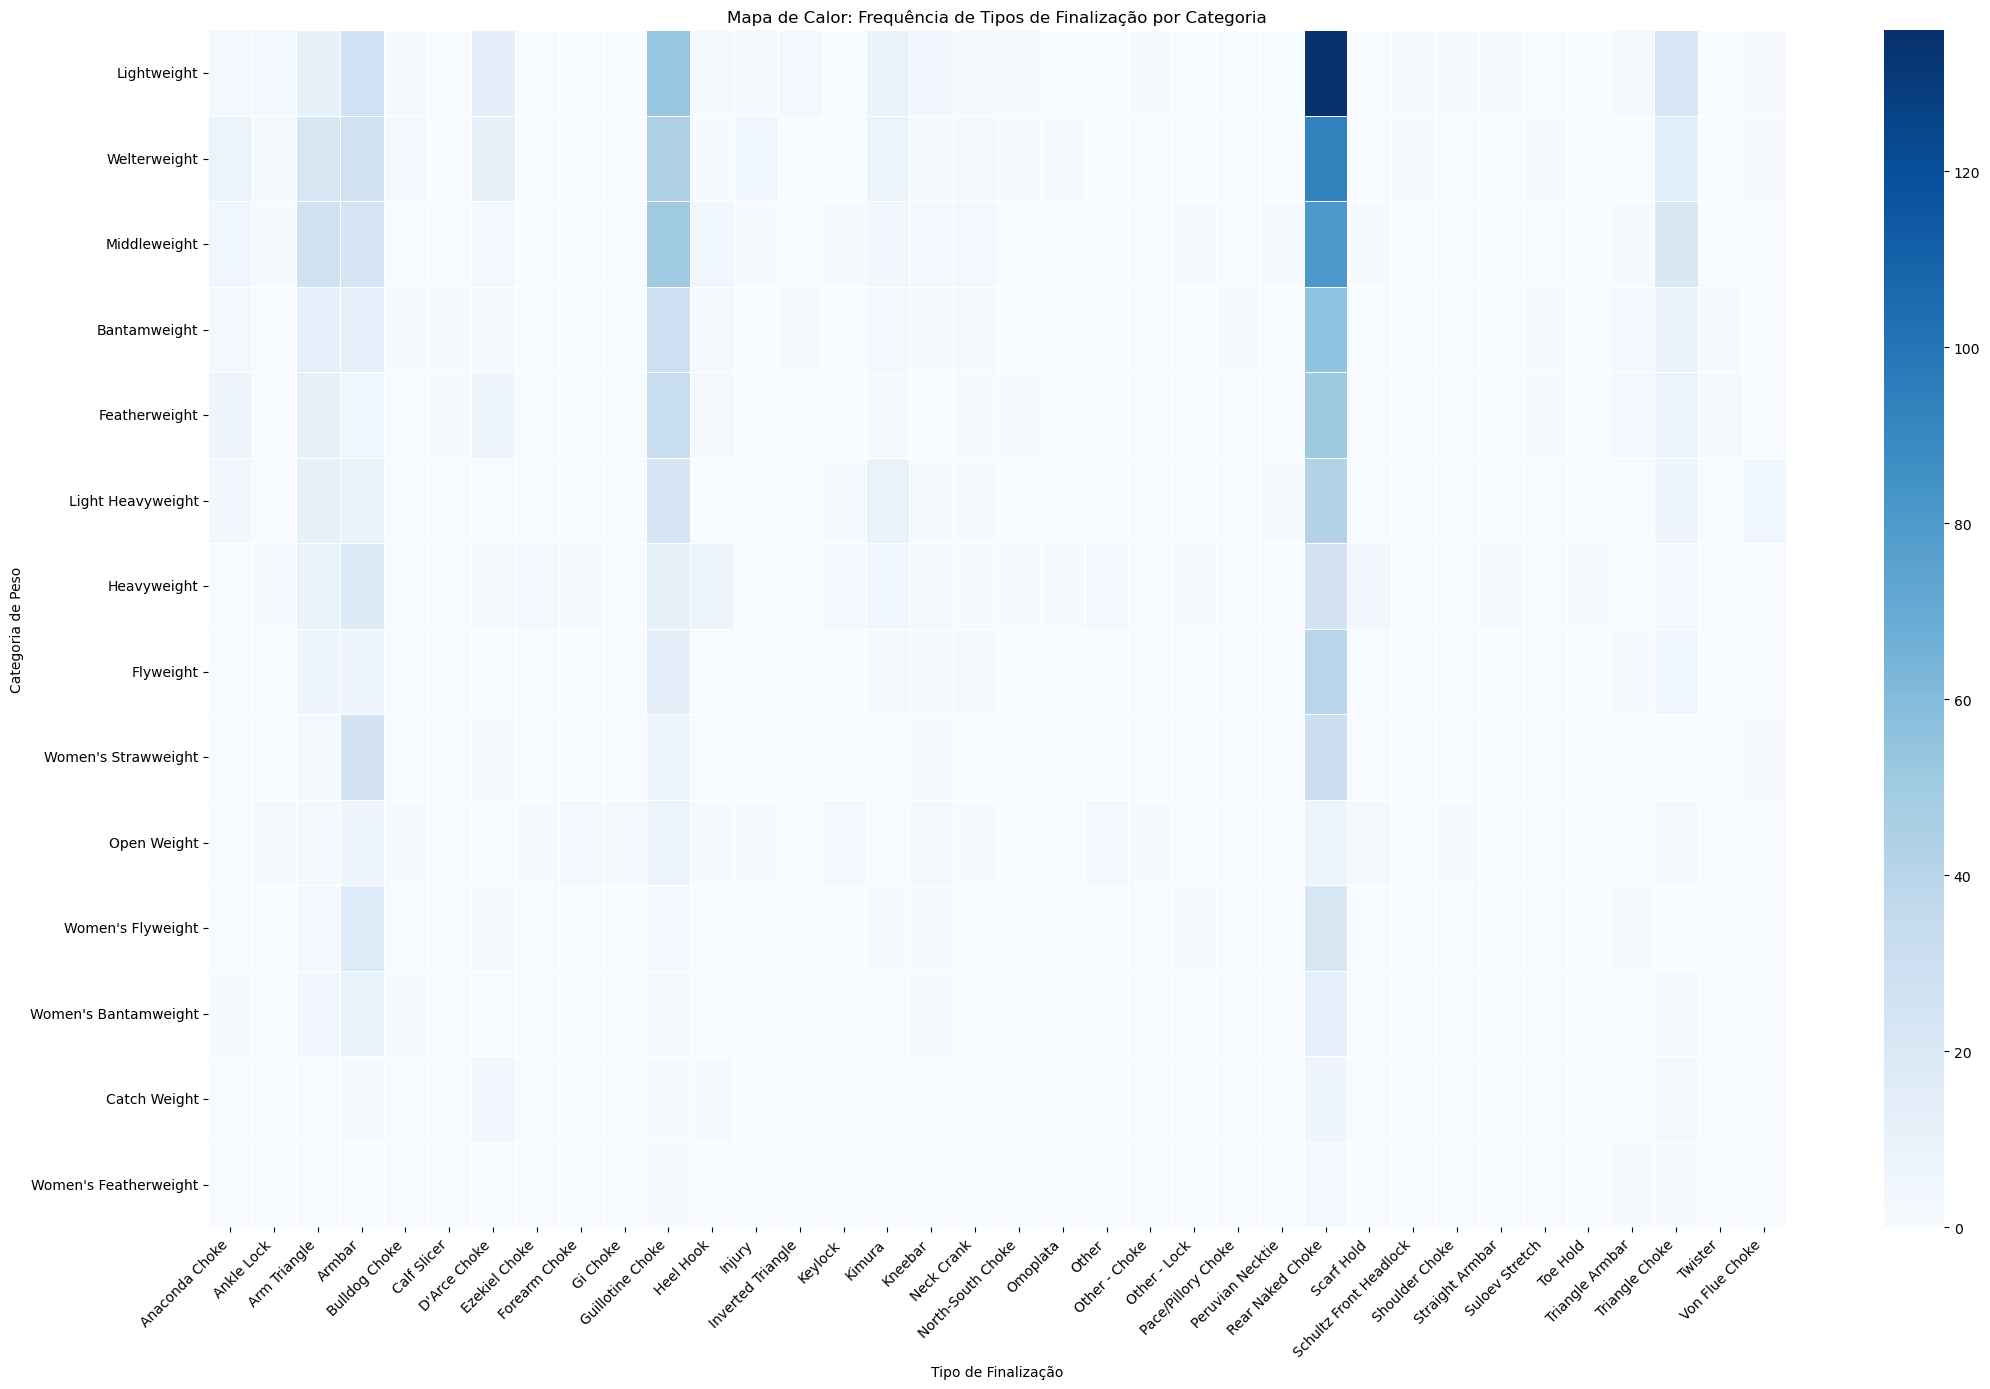

In [124]:
# Mapa de Calor: Frequência de Tipos de Finalização por Categoria

plt.figure(figsize=(22, 14)) 
sns.heatmap(freq_finalizacoes_cat, annot=False, fmt="d", cmap="Blues", linewidths=.5)

plt.title('Mapa de Calor: Frequência de Tipos de Finalização por Categoria')
plt.xlabel('Tipo de Finalização')
plt.ylabel('Categoria de Peso')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Tabela de Frequência (% por Linha - Top 10 Finalizações):
 Finalização    Rear Naked Choke  Guillotine Choke     Armbar  Arm Triangle  \
Categoria                                                                    
Bantamweight          42.748092         22.137405   9.923664      9.923664   
Catch                 40.000000          6.666667   6.666667      0.000000   
Featherweight         41.129032         25.806452   4.032258      9.677419   
Flyweight             52.702703         18.918919   9.459459      8.108108   
Heavyweight           29.411765         14.117647  22.352941     11.764706   

Finalização    Triangle Choke  D'Arce Choke    Kimura  Anaconda Choke  \
Categoria                                                               
Bantamweight         6.870229      1.526718  2.290076        2.290076   
Catch               13.333333     26.666667  0.000000        0.000000   
Featherweight        6.451613      4.838710  0.806452        5.645161   
Flyweight            6.756757

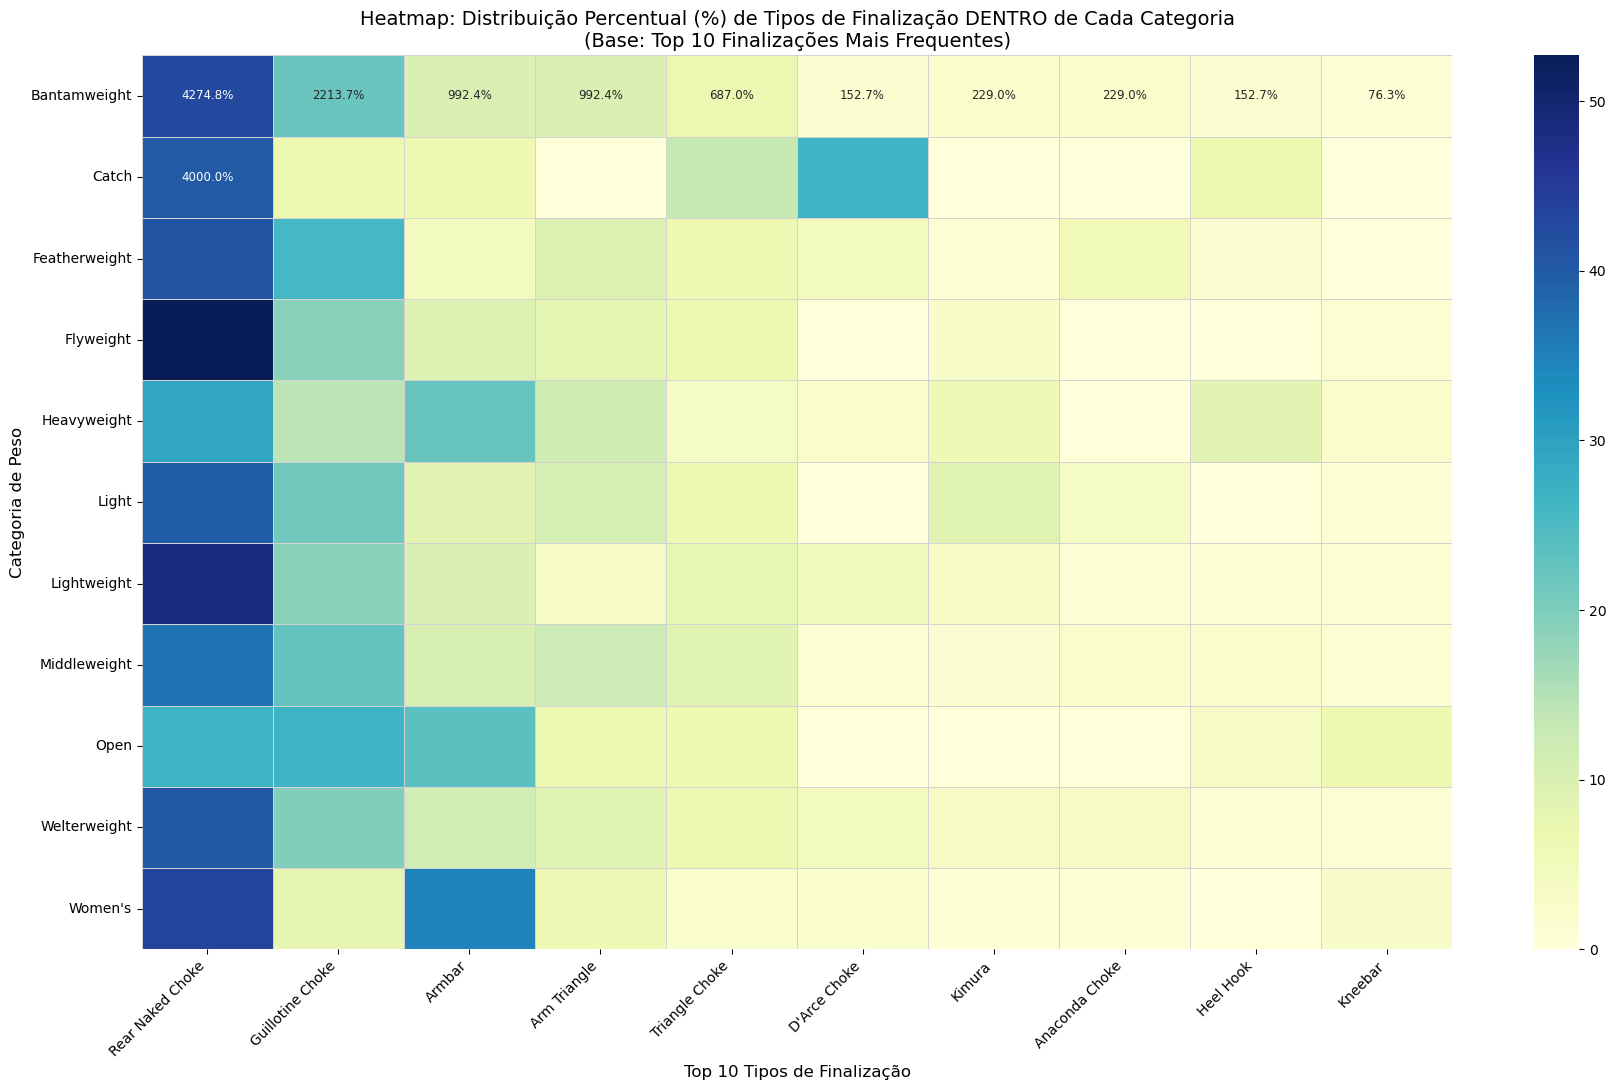

In [125]:
# TOP 10

if not historico_top10_finalizacoes.empty and 'top_10_nomes' in locals():
    freq_top10_cat_percent_row = pd.crosstab(
        historico_top10_finalizacoes['Categoria'],
        historico_top10_finalizacoes['Finalização'],
        normalize='index' # <--- CALCULA % POR LINHA (CATEGORIA)
    )

    # Multiplicar por 100 se quiser ver 0-100 em vez de 0.0-1.0
    freq_top10_cat_percent_row = freq_top10_cat_percent_row * 100

    # Reordenar colunas para manter a ordem do Top 10 (opcional, mas bom para visualização)
    freq_top10_cat_percent_row = freq_top10_cat_percent_row.reindex(columns=top_10_nomes, fill_value=0)

    print("Tabela de Frequência (% por Linha - Top 10 Finalizações):\n", freq_top10_cat_percent_row.head())

    # --- PASSO 2: Plotar o Heatmap com Porcentagens ---
    plt.figure(figsize=(18, 11)) # Ajuste o tamanho

    sns.heatmap(
        freq_top10_cat_percent_row, # <-- Usa a tabela de porcentagens
        annot=True,                 # <-- Mostrar as porcentagens
        fmt=".1%",                  # <<-- Formata como porcentagem 
        cmap="YlGnBu",               # Ou outro mapa de cores (ex: "viridis", "YlGnBu")
        linewidths=.5,
        linecolor='lightgray',
        annot_kws={"size": 8.5}      # Ajuste o tamanho da fonte
    )

    plt.title('Heatmap: Distribuição Percentual (%) de Tipos de Finalização DENTRO de Cada Categoria\n(Base: Top 10 Finalizações Mais Frequentes)', fontsize=14)
    plt.xlabel('Top 10 Tipos de Finalização', fontsize=12)
    plt.ylabel('Categoria de Peso', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


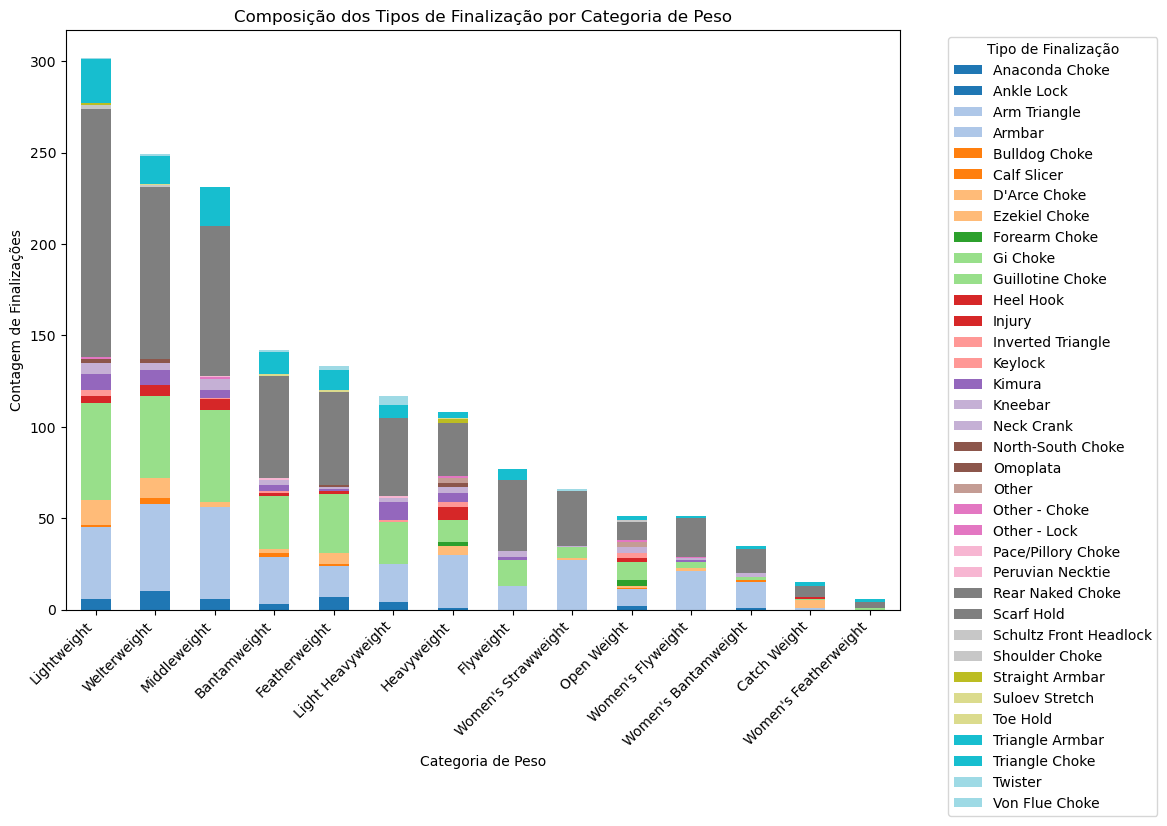

In [126]:

freq_finalizacoes_cat = pd.crosstab(historico_finalizações['Categoria'], historico_finalizações['Finalização'])

# Opcional: Ordenar categorias por total de finalizações
freq_finalizacoes_cat['Total'] = freq_finalizacoes_cat.sum(axis=1)
freq_finalizacoes_cat = freq_finalizacoes_cat.sort_values('Total', ascending=False).drop('Total', axis=1)


if not freq_finalizacoes_cat.empty:
    # O próprio Pandas facilita plotar DataFrames diretamente
    ax = freq_finalizacoes_cat.plot(kind='bar', stacked=True, figsize=(14, 8),
                                    cmap='tab20') # cmap='tab20' oferece mais cores distintas

    plt.title('Composição dos Tipos de Finalização por Categoria de Peso')
    plt.xlabel('Categoria de Peso')
    plt.ylabel('Contagem de Finalizações')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Tipo de Finalização', bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda fora do gráfico
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta layout para caber a legenda
    plt.show()
else:
     print("Sem dados de finalização para gerar o gráfico de barras empilhadas.")